### setup

In [90]:
import sympy as sym
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt

### Problem 1

#### insert image

### Problem 2

In [70]:
def x_init_gen(dim):
    x_inits = (np.zeros((dim,1)) - 10) +  np.random.rand(dim,1) * 20
    return x_inits

In [71]:
#generate random nxn diagonal matrix with elements betwen 0.5 - 1.9
def Q_gen(dim):
    I = np.identity(dim)
    rand_arr = (np.zeros((dim,1)) + 0.5) +  np.random.rand(dim,1) * 1.4
    Q = I * rand_arr
    return Q

In [72]:
#set up symbollic f and grad_f for lambda evals
x = sym.MatrixSymbol('x', n, 1)
Q = sym.MatrixSymbol('Q', n, n)
f = sym.Rational(1,2) * x.T * Q * x
grad_f = f.diff(x)
f_lam = sym.lambdify([x, Q], f)
grad_f_lam = sym.lambdify([x, Q], grad_f)

In [76]:
#define our function that performs gradient descent on ambigiously dimensonal funcs
#creates random x and Q per descent
def ambig_dim_grad_desc(dim):
    eps = 0.1
    num_its = 0
    Q = Q_gen(dim)
    x = x_init_gen(dim)
    grad = grad_f_lam(x, Q)
    mag_grad = np.linalg.norm(grad)
    while (mag_grad > eps):
        x_next = x - grad
        grad = grad_f_lam(x_next, Q)
        mag_grad = np.linalg.norm(grad)
        x = x_next
        num_its = num_its + 1
    return num_its
    
    

In [84]:
n_vals = np.arange(1,101)
ave_it_vals = np.zeros(100)
#iterate over n = 1-100
for n in range(1,101):
    # perform 100 random inits per n and average number of its
    ave = 0
    for i in range(100):
        ave = ave + (1/100 * ambig_dim_grad_desc(n))
    # add averaged val to list
    ave_it_vals[n-1] = ave


<IPython.core.display.Javascript object>


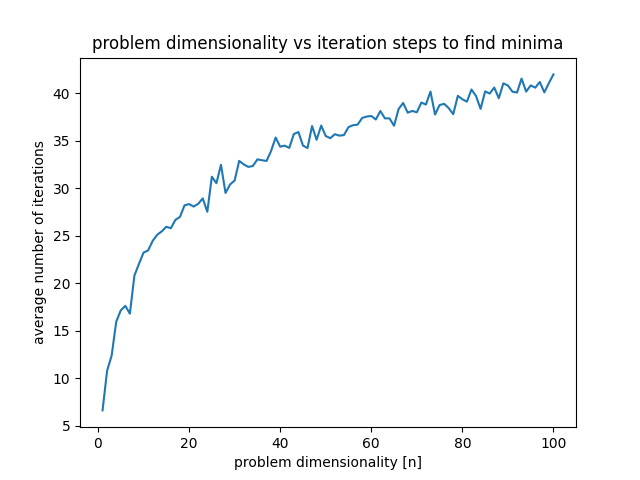

In [95]:
plt.figure()
plt.plot(n_vals, ave_it_vals)
plt.xlabel("problem dimensionality [n]")
plt.ylabel("average number of iterations")
plt.title("problem dimensionality vs iteration steps to find minima")
plt.show()